In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# I. Expériences de prédiction de cancer de la poitrine

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer['data'].shape)

X = cancer['data']
y = cancer['target']


(569, 30)


## Découpage du jeu de données

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y)

# jeu de données bien découpé
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(426, 30) (143, 30) (426,) (143,)


## Prétraitement : normalisation

In [4]:
from sklearn.preprocessing import StandardScaler

# print to see if standardisation worked
print("avant standardisation : ")
print("moyenne : {} , \t écart-type : {} \n".format(np.mean(X_train[:,1], axis=0),np.std(X_train[:,1],axis=0)))

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# same as before
print("après standardisation : ")
print("moyenne : {} , \t écart-type : {} ".format(np.mean(X_train[:,1], axis=0),np.std(X_train[:,1],axis=0)))


avant standardisation : 
moyenne : 19.311267605633805 , 	 écart-type : 4.259305227649685 

après standardisation : 
moyenne : -6.067134275416348e-16 , 	 écart-type : 1.0 


## Premier modèle

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter = 800)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=800)

## Evaluation du modèle

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.94      1.00      0.97        84

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



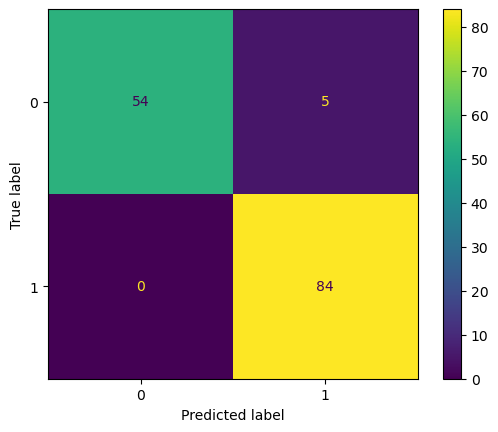

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

pred = mlp.predict(X_test)
conf_maxtrix = ConfusionMatrixDisplay.from_predictions(y_test, pred)
#plt.figure()
#conf_maxtrix.plot()
#plt.show()
print(classification_report(y_test,  pred))

## Ajustement des hyper-paramètres (profondeur et taille de couche)

In [26]:
(10)*3

30

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp1 = MLPClassifier(max_iter= 1000)
parameters = {'hidden_layer_sizes':[(int(5*(i/2)),int(5*(i/2)),int(5*(i/2))) for i in range(2,20)]}
mod = GridSearchCV(mlp1,param_grid=parameters)

mod.fit(X_train,y_train)
print(mod.best_params_)

{'hidden_layer_sizes': (32, 32, 32)}


In [170]:
### premier couche
mlp1 = MLPClassifier(max_iter= 1000)
parameters = {'hidden_layer_sizes':[(int(10*(i/2)),10, 10) for i in range(2,10)]}
mod = GridSearchCV(mlp1,param_grid=parameters)
mod.fit(X_train,y_train)
print(mod.best_params_)

### deuxieme couche
mlp1 = MLPClassifier(max_iter= 1000)
parameters = {'hidden_layer_sizes':[(10,int(10*(i/2)),10) for i in range(2,10)]}
mod = GridSearchCV(mlp1,param_grid=parameters)
mod.fit(X_train,y_train)
print(mod.best_params_)

### troisieme couche
mlp1 = MLPClassifier(max_iter= 1000)
parameters = {'hidden_layer_sizes':[(10, 10, int(10*(i/2))) for i in range(2,10)]}
mod = GridSearchCV(mlp1,param_grid=parameters)
mod.fit(X_train,y_train)
print(mod.best_params_)


{'hidden_layer_sizes': (40, 10, 10)}
{'hidden_layer_sizes': (10, 20, 10)}
{'hidden_layer_sizes': (10, 10, 40)}


In [169]:
for iterations in (10,20,30,50,100,200,300,500,1000):
    mlp2 = MLPClassifier(hidden_layer_sizes= (25,10,10), max_iter= iterations)

    mlp2.fit(X_train,y_train)
    pred2 = mlp2.predict(X_test)

    #conf_maxtrix = ConfusionMatrixDisplay.from_predictions(y_test, pred2)
    print(classification_report(y_test,  pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        59
           1       0.96      0.89      0.93        84

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        59
           1       0.88      0.93      0.90        84

    accuracy                           0.88       143
   macro avg       0.88      0.87      0.88       143
weighted avg       0.88      0.88      0.88       143

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        59
           1       0.93      0.99      0.96        84

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.93      0.96      0.95        84

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.94      1.00      0.97        84

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.95      1.00      0.98        84

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.94      1.00      0.97        84

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.94      1.00      0.97        84

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

              preci

## 1. 
We tried different architectures, with multilayer networks composed of three layers, each containing five neurons, to analyze the performance of the models. We found that these models did not show significant differences. All configurations produced similar results, and cross-validation yielded random performance.

When varying only one layer, the results remained the same.

## 2.

When we modify the number of iterations before convergence, the result varies. If the number of iterations is too low, the evaluation metrics perform poorly. By increasing the number of iterations, the metrics improve until reaching a level similar to that obtained with the multilayer network (10, 10, 10) and max_iter = 200.